# **Introduction to biogeographic data analysis using geopandas**

---

###### ${By\ João\ Gabriel\ Nunes\ and\ Ubiratan\ Batista}$

# Environment Setup

To start our activities, we first need to install (or load) some packages that will be used throughout our course

In [ ]:
# We will use !pip install every time we need to install (or load) a new resource package
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade rtree
!pip install --upgrade geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2


In [ ]:
#Packages that are already downloaded or provided by Colab are imported using IMPORT
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Importing the Data

With the environment set up (meaning all the necessary packages are already loaded), we can import the data. The biogeographical data to be used is about the distribution of the golden mussel, retrieved from the Global Biodiversity Information Facility (GBIF) website.

We will use a pandas dataframe to visualize our data spreadsheet.

*Reference*: the dataset was downloaded from GBIF.org (accessed on December 15 2020). Download: https://doi.org/10.15468/dl.rd22mv

In [ ]:
# Importing the data directly from a URL, using a raw GitHub link
# First, we define a variable - the spreadsheet containing the data
url = 'https://raw.githubusercontent.com/jgnunes/geopandas/main/data/0137414-200613084148143.csv'
distrib_df =  pd.read_csv(url, delimiter="\t")

In [ ]:
# Analyzing the first elements of our data spreadsheet.
# Important for students to get an idea of the data they are working with
distrib_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2988494639,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/55655383,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,Leonardo Adrián LEIVA,2020-08-07T00:22:10,CC_BY_NC_4_0,Leonardo Adrián LEIVA,Leonardo Adrián LEIVA,NaN,NaN,2020-12-10T18:26:40.722Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,2984453018,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64738914,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,Frederico Acaz Sonntag,2020-11-12T17:48:31,CC_BY_NC_4_0,Frederico Acaz Sonntag,Frederico Acaz Sonntag,NaN,NaN,2020-12-10T18:28:10.764Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,2984354738,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64499479,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,Juan Matías,2020-11-09T04:24:27,CC_BY_NC_4_0,Juan Matías,Juan Matías,NaN,NaN,2020-12-10T18:28:26.864Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,2898273170,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/62549860,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,Rafael Rosa,2020-10-14T11:55:16,CC_BY_NC_4_0,Márcia Cristina Martins da Silva,Márcia Cristina Martins da Silva,NaN,NaN,2020-12-10T18:27:52.539Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
4,2884531309,51c49096-dc31-4077-b35c-4510a8ee1ee8,3fae5b43-131d-11eb-a93b-06f21c000156,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,Arthur E Bogan/6May2019,NaN,CC0_1_0,Noth Carolina Museum of Natural Sciences,NaN,NaN,NaN,2020-11-26T18:29:08.796Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...


In [ ]:
# Analyzing the last elements of our data Frame
# Important to confirm the integrity of the file
distrib_df.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
103,215781205,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:24.321Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
104,215781203,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.989Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...
105,215781202,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.916Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
106,215781201,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.895Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
107,215781200,86b50d88-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,"DAVIS, G.M.",NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2020-11-27T03:57:35.877Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...


#Exploring the Dataframe

Now that we have our data, we can explore the information it contains, such as the number of columns present and the content of some of them. This is important to guide the analysis towards data that is more promising or best serves our objective.


Furthermore, we will investigate the content of columns that appear to be our most promising target columns - specifically, from their first twenty rows.


In [ ]:
# Listing all the columns in the GBIF table for inspection
distrib_df.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [ ]:
# After reviewing all the columns, we will focus on the content of columns of interest
# Analyzing the first 20 elements of the columns for geographic coordinates, species, and country
distrib_df[['decimalLatitude', 'decimalLongitude', 'species', 'countryCode']].head(20)

,decimalLatitude,decimalLongitude,species,countryCode
0,-31.664501,-60.756241,Limnoperna fortunei,AR
1,-27.309596,-52.102021,Limnoperna fortunei,BR
2,-34.860164,-57.876459,Limnoperna fortunei,AR
3,-20.829037,-50.546071,Limnoperna fortunei,BR
4,28.840000,116.491997,Limnoperna fortunei,CN
5,-31.659614,-60.756937,Limnoperna fortunei,AR
6,-31.666302,-60.754477,Limnoperna fortunei,AR
7,-33.597518,-59.808151,Limnoperna fortunei,AR
8,-32.910353,-60.674343,Limnoperna fortunei,AR
9,-32.210337,-64.471828,Limnoperna fortunei,AR


In [ ]:
# Analyzing the last 20 elements of the columns for geographic coordinates, species, and country
# Continuing the idea of verifying and interacting with the data
distrib_df[['decimalLatitude', 'decimalLongitude', 'species', 'countryCode']].tail(20)

,decimalLatitude,decimalLongitude,species,countryCode
88,16.050000,105.216667,Limnoperna fortunei,TH
89,14.533333,103.783333,Limnoperna fortunei,TH
90,16.050000,105.216667,Limnoperna fortunei,TH
91,16.050000,105.216667,Limnoperna fortunei,TH
92,16.050000,105.216667,Limnoperna fortunei,TH
93,14.150000,105.816667,Limnoperna fortunei,LA
94,14.108333,105.858333,Limnoperna fortunei,LA
95,16.050000,105.216667,Limnoperna fortunei,TH
96,15.383333,105.500000,Limnoperna fortunei,TH
97,15.233333,105.250000,Limnoperna fortunei,TH


#Map

In this section, we will proceed towards our final goal, which is the construction of distribution maps. With the data imported and explored, we can use it to plot points on different map shapes.

##Mounting the Drive

We need to add some important files for building the maps. These files are in a folder called `Python Workshop Data`, which was shared by the instructors. These files should be added to your `My Drive` folder.

The first step is to mount your `My Drive` within the file system of this notebook so that you can access any files stored in your Drive from the Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, go to the web page of your Google Drive (drive.google.com), and click on `Shared with me`. You should see a folder named `Python Workshop Data`. Right-click on the folder and then click on `Organize` and `Add shortcut`.
![figura1.png](https://github.com/larissagraciano/Miscellaneous/blob/main/figura1.png?raw=true)

With the `My Drive` option selected, click `Add`. By doing this, you'll be creating a shortcut to the `Python Workshop Data` folder, which contains the files we will use in this notebook, within your `My Drive`.
![figura2.png](https://github.com/larissagraciano/Miscellaneous/blob/main/figura2.png?raw=true)

To check if the procedure worked, click on the folder icon in the left sidebar of this notebook (`Files`). Then click on `drive`, and then on  `MyDrive`. You should see that the `Python Workshop Data` has been added as a subfolder of `MyDrive`.
![figura3.png](https://github.com/larissagraciano/Miscellaneous/blob/main/figura3.png?raw=true)

If you've reached this point, great! If not, please seek assistance.



Now that you've added the folder with our data to your own Drive, let's import one of our files of interest. This file is `World_Countries-shp.zip`, which contains all the information necessary to draw a world map. This file will be read with the `geopandas.read_file` function, which means that the object generated, `map_df`, will be a GeoPandas DataFrame (GPD).

GPDs are virtually identical to traditional Pandas DataFrames, with the difference that they contain a mandatory column called *geometry*. The *geometry* column contains all the information to draw a spatial object on the map, whether it's a simple point or a complex polygon representing, for example, the borders of a country (as is the case with `map_df`).

##Collecting Shape Data

In [ ]:
# Creating our GeoPandas DataFrame for the world map shape by extracting the "World Countries shp" zip file.
map_df = gpd.read_file('zip:///content/drive/MyDrive/Python Workshop Data/World_Countries-shp.zip')

In [ ]:
# Let's visualize how the Map Information Frame is distributed.
map_df

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry
0,1,Antarctica,AQ,Antarctica,Large island,4,Antarctica,1.182988e+12,1.813174e+07,"MULTIPOLYGON (((-160.32489 -79.89787, -160.527..."
1,2,Antarctica,AQ,Antarctica,Medium island,3,Antarctica,3.694553e+11,1.945439e+07,"MULTIPOLYGON (((165.98732 -78.16456, 166.00089..."
2,3,Antarctica,AQ,Antarctica,Primary land,5,Antarctica,6.970359e+14,2.072300e+08,"POLYGON ((-179.99986 -89.00000, -179.99920 -84..."
3,4,Antarctica,AQ,Antarctica,Small island,2,Antarctica,6.396456e+10,1.420865e+07,"MULTIPOLYGON (((-149.94911 -77.51043, -150.032..."
4,5,Argentina,AR,South America,Medium island,3,Argentina,4.047231e+09,9.825746e+05,"MULTIPOLYGON (((-64.31110 -54.73605, -64.30267..."
...,...,...,...,...,...,...,...,...,...,...
650,651,Iceland,IS,Europe,Small island,2,Iceland,5.793328e+08,1.196809e+06,"MULTIPOLYGON (((-20.59745 63.29679, -20.60088 ..."
651,652,Iceland,IS,Europe,Very small island,1,Iceland,2.050640e+08,2.038826e+06,"MULTIPOLYGON (((-20.31755 63.38716, -20.32206 ..."
652,653,Ireland,IE,Europe,Primary land,5,Ireland,1.942732e+11,9.889288e+06,"POLYGON ((-7.36671 55.38294, -7.36607 55.38251..."
653,654,Ireland,IE,Europe,Small island,2,Ireland,9.744889e+08,1.534425e+06,"MULTIPOLYGON (((-9.46527 51.45360, -9.46495 51..."


Now we create a GeoPandas DataFrame (`distrib_points`) from the GBIF distribution DataFrame (`distrib_df`), taking into account the information from the world map GeoPandas DataFrame (`map_df`). The *geometry* column contains information to draw points (Point), which represent locations of golden mussel occurrences on the map.

In [ ]:
# Building the Geo DataFrame for the distribution of the golden mussel
distrib_global = gpd.GeoDataFrame(
    distrib_df, geometry=gpd.points_from_xy(
        distrib_df.decimalLongitude, distrib_df.decimalLatitude), crs = map_df.crs)

##Building the Map

With the information stored as a Geo Data Frame, we will use `map_df` to draw a world map. After drawing the map, we will use the Geo Data Frame we created, `distrib_points`, to plot the points of golden mussel occurrence records

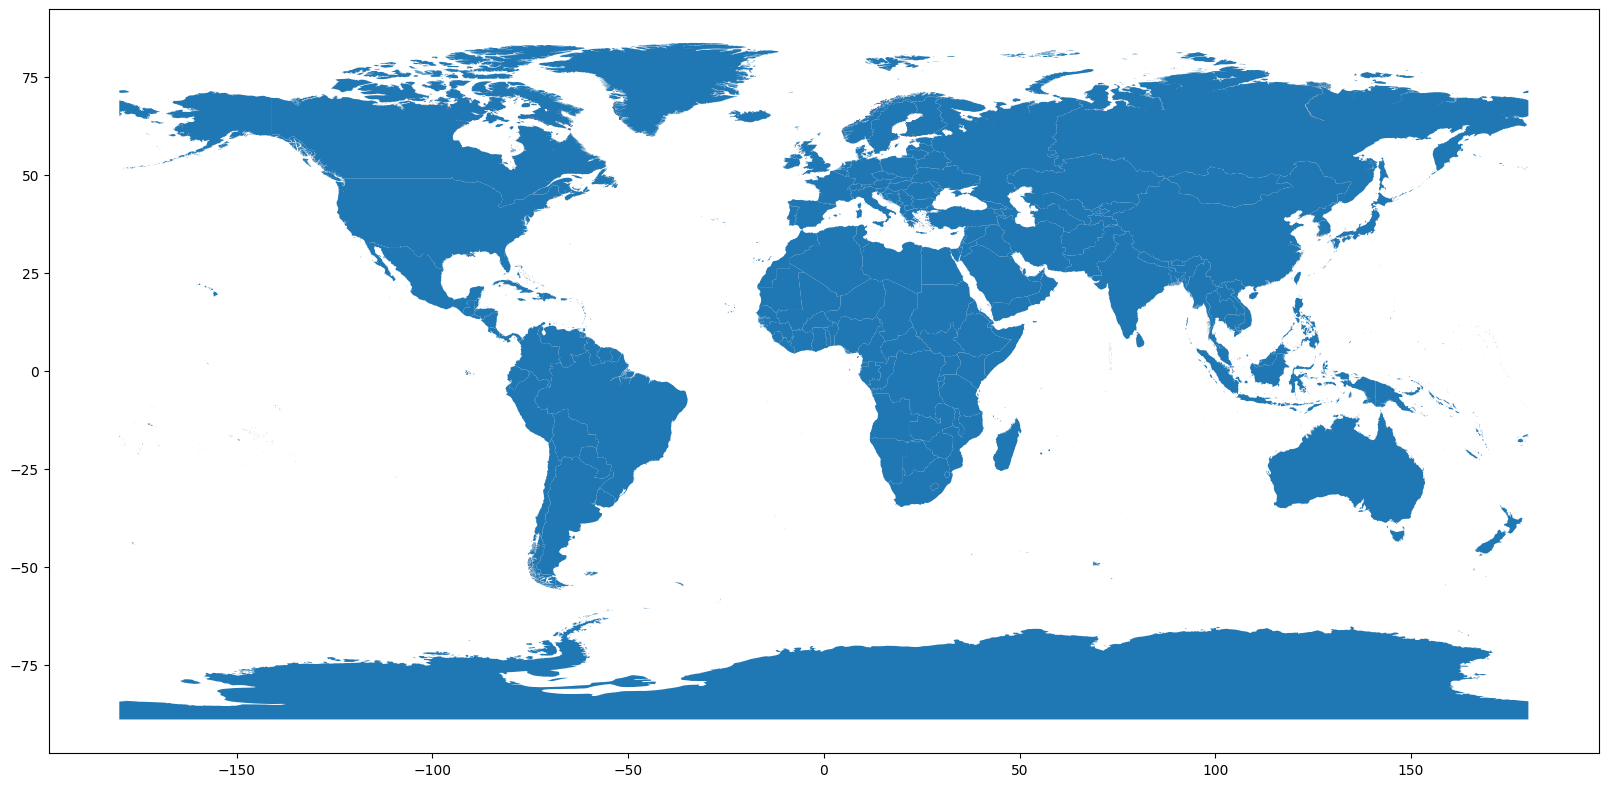

In [ ]:
# First, we create a sub-plot with Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(20,10))

# Then, we set up the plot for the world map, onto which the golden mussel occurrence points will be overlaid
base = map_df.plot(ax=ax)

<Axes: >

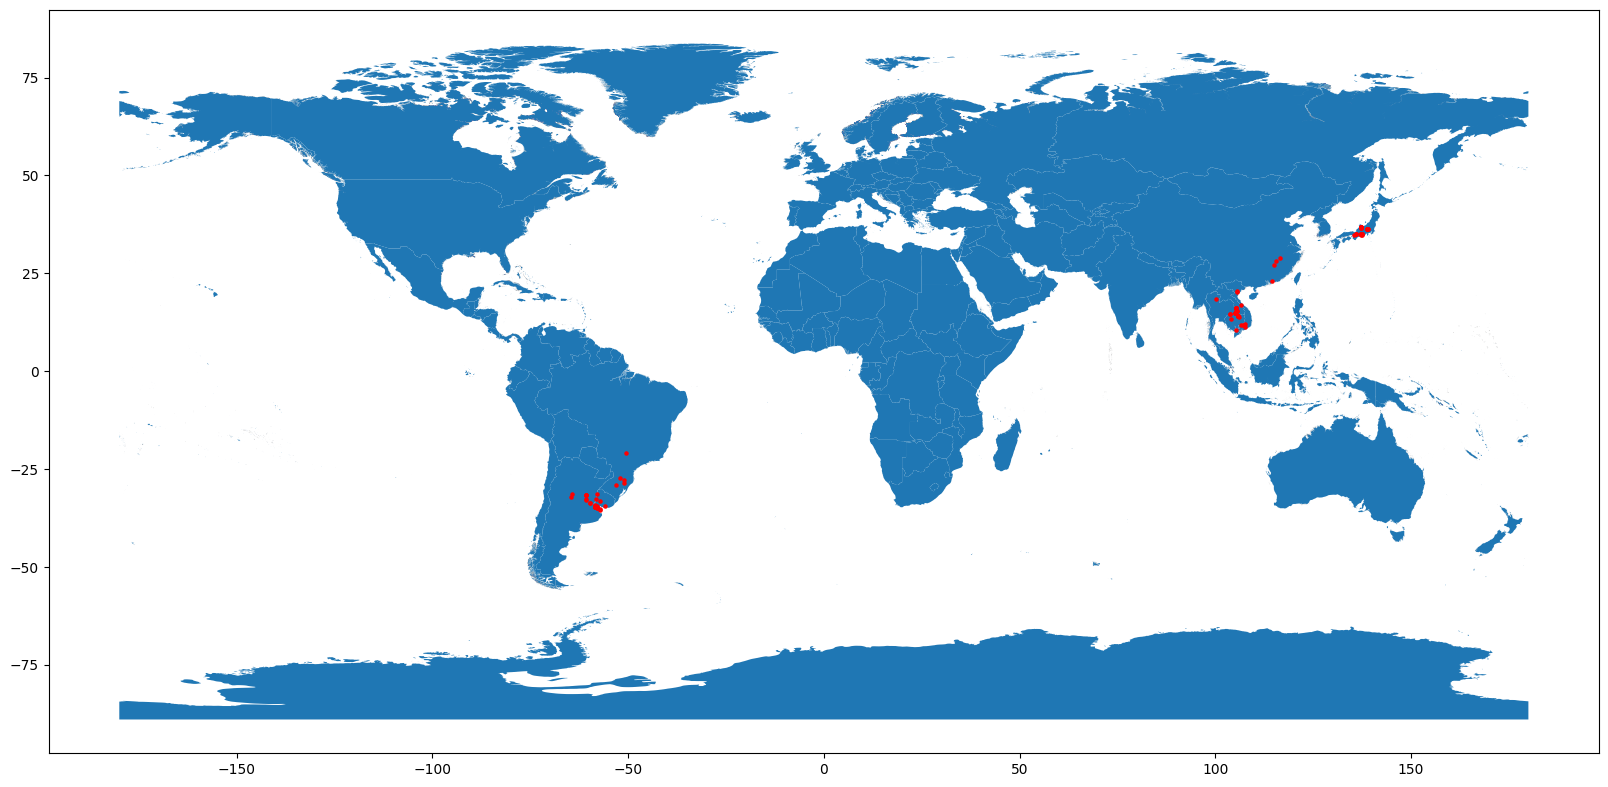

In [ ]:
# As the map base is ready, let's plot the Golden Mussel occurrence points
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = map_df.plot(ax=ax)

distrib_global.plot(ax=base, marker='o', color='red', markersize=5, legend=True)


Text(205.59722222222223, 0.5, 'Latitude')

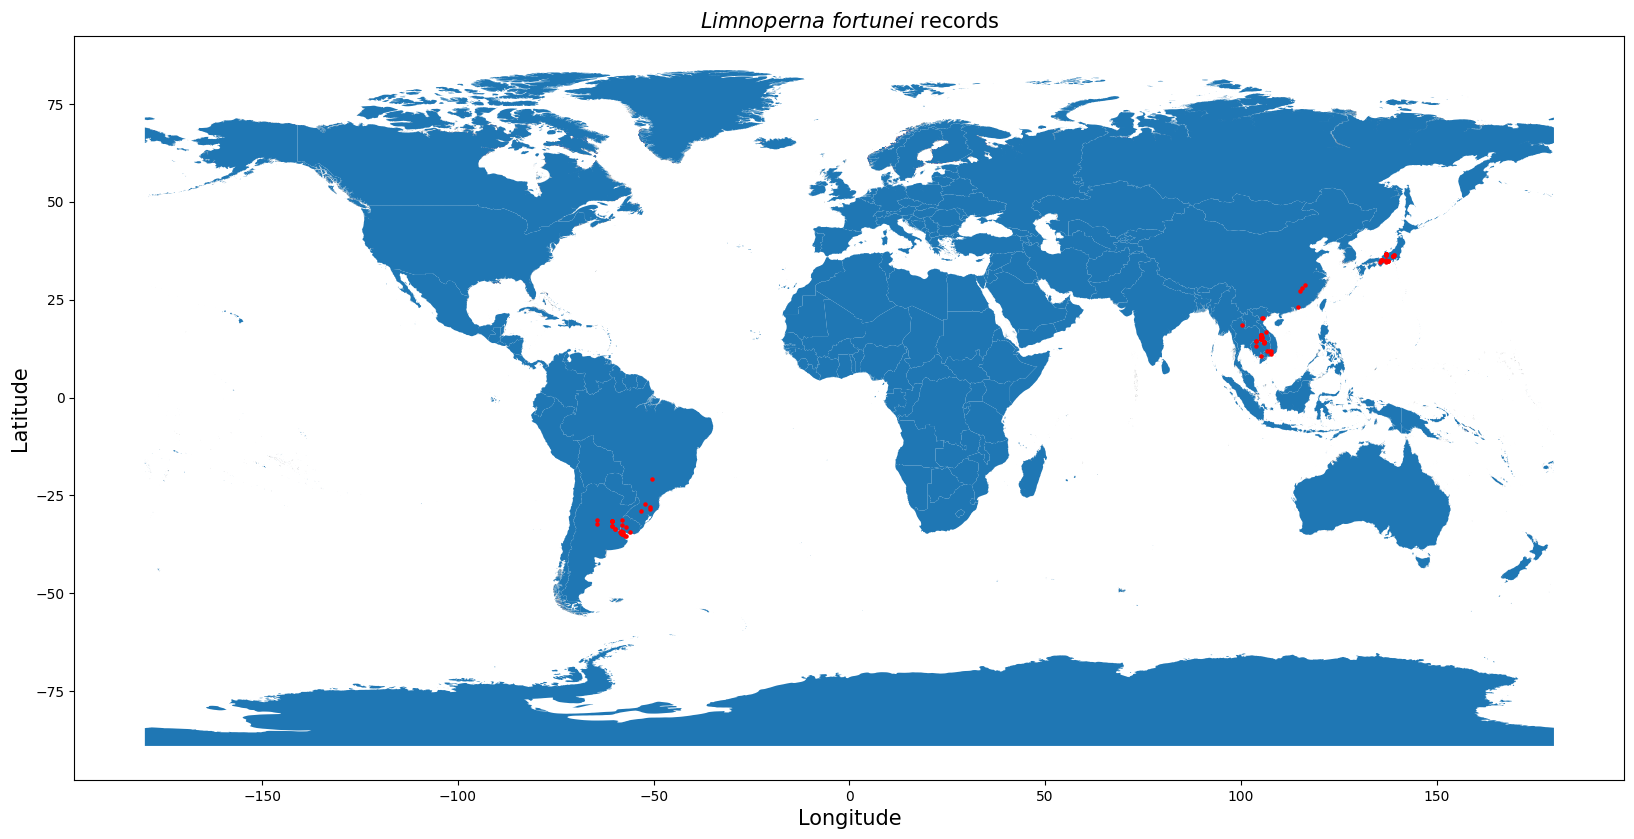

In [ ]:
# Adding graphical information, such as the figure title and axes
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = map_df.plot(ax=ax)
distrib_global.plot(ax=base, marker='o', color='red', markersize=5, legend=True)

ax.set_title("${Limnoperna\ fortunei}$ records", fontdict={'fontsize': 15, 'fontweight': 'medium'})

plt.xlabel("Longitude", fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.ylabel("Latitude", fontdict={'fontsize': 15, 'fontweight': 'medium'})



##Working on the Map

Now we can filter only the golden mussel occurrences that are from South America, our region of greatest interest.

In [ ]:
# As in the previous example, we will create a GeoPandas DataFrame for the Map shape
# Selecting only occurrences from the world map that belong to South America
map_df_america = map_df[map_df['CONTINENT'] == 'South America']

# Selecting only occurrences in South America that are part of the golden mussel occurrence map
distrib_america = gpd.overlay(distrib_global, map_df_america, how='intersection')

Since we nwow have these two GeoPandas DataFrames (`map_df_america` and `distrib_america`), we can create a distribution map specifically for South America.

Text(0.5, 1.0, 'Limnoperna fortunei in South America')

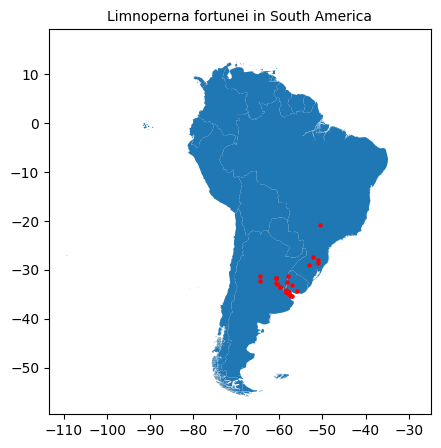

In [ ]:
# Setting up the figure's foundation with Matplotlib subplots
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# Initializing a background map with South American countries
base_america = map_df_america.plot(ax=ax)

# Plotting golden mussel occurrence points using the South American map as a background
distrib_america.plot(ax=base_america, marker='o', color='red', markersize=5)

ax.set_title("Limnoperna fortunei in South America", fontdict={'fontsize': 10, 'fontweight': 'medium'})


#Choropleth Map of Distribution

We have seen that it's possible to pinpoint the distribution points of the species on the map. However, how many golden mussel records have been documented in each country according to GBIF?

In this section, we will construct a choropleth map that illustrates this relationship.

## Inspecting the Data

In [ ]:
# Using the Global Geo DataFrame of mussel distribution.
# We will evaluate the number of individuals sampled for each country
distrib_global['countryCode'].value_counts()

AR    28
JP    27
TH    20
LA    13
VN     7
BR     5
CN     4
UY     3
KH     1
Name: countryCode, dtype: int64

From now on, we will work on building a map where each country is colored according to the number of golden mussel records. To achieve this, we will create an additional column in `distrib_global` called `countryOccurrences`, which will contain the number of golden mussel records in each country.

In [ ]:
# Demonstrating the use of the groupby function
# Reminding the students that if they don't create the variable, the information will be lost.
distrib_global.groupby(['countryCode'])['countryCode'].transform('count')

0      28
1       5
2      28
3       5
4       4
       ..
103    20
104    13
105    13
106    13
107    13
Name: countryCode, Length: 108, dtype: int64

##Concatenating Data of Interest

In [ ]:
# Now, we will create the variable with the new column
# Presenting the new column in the Geo DataFrame of distribution

distrib_global['countryOccurrences'] = distrib_global.groupby(['countryCode'])['countryCode'].transform('count')
distrib_global.head()


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry,countryOccurrences
0,2988494639,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/55655383,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,CC_BY_NC_4_0,Leonardo Adrián LEIVA,Leonardo Adrián LEIVA,NaN,NaN,2020-12-10T18:26:40.722Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-60.75624 -31.66450),28
1,2984453018,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64738914,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,CC_BY_NC_4_0,Frederico Acaz Sonntag,Frederico Acaz Sonntag,NaN,NaN,2020-12-10T18:28:10.764Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-52.10202 -27.30960),5
2,2984354738,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/64499479,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,CC_BY_NC_4_0,Juan Matías,Juan Matías,NaN,NaN,2020-12-10T18:28:26.864Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...,POINT (-57.87646 -34.86016),28
3,2898273170,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/62549860,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,CC_BY_NC_4_0,Márcia Cristina Martins da Silva,Márcia Cristina Martins da Silva,NaN,NaN,2020-12-10T18:27:52.539Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;INSTITUTION_MATCH...,POINT (-50.54607 -20.82904),5
4,2884531309,51c49096-dc31-4077-b35c-4510a8ee1ee8,3fae5b43-131d-11eb-a93b-06f21c000156,Animalia,Mollusca,Bivalvia,Mytilida,Mytilidae,Limnoperna,Limnoperna fortunei,...,CC0_1_0,Noth Carolina Museum of Natural Sciences,NaN,NaN,NaN,2020-11-26T18:29:08.796Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...,POINT (116.49200 28.84000),4


Now, note that each occurrence row from GBIF has the number of golden mussel records by country:

In [ ]:
# Evaluating some columns of interest, such as number of occurrences and country
distrib_global[['gbifID', 'countryCode', 'countryOccurrences']]

,gbifID,countryCode,countryOccurrences
0,2988494639,AR,28
1,2984453018,BR,5
2,2984354738,AR,28
3,2898273170,BR,5
4,2884531309,CN,4
...,...,...,...
103,215781205,TH,20
104,215781203,LA,13
105,215781202,LA,13
106,215781201,LA,13


Notice that`distrib_global` redundantly represents the information about the number of occurrences per country. The only pieces of information that interest us are the country and the associated number of occurrences. Let's create a new DataFrame that contains only the columns of interest and does not contain duplicated information.

In [ ]:
# Building a DataFrame of golden mussel distributions by country
distrib_countries = distrib_global[['countryCode', 'countryOccurrences']].drop_duplicates()
distrib_countries

,countryCode,countryOccurrences
0,AR,28
1,BR,5
4,CN,4
11,UY,3
13,KH,1
19,VN,7
33,JP,27
61,TH,20
76,LA,13


Note that the new DataFrame created contains only the information we are interested in, namely, the number of golden mussel occurrences per country:

Now, we will merge `map_df` and `distrib_countries` to add the `countryOccurrences` column from `distrib_countries` to `map_df`:

In [ ]:
occurrences_df = pd.merge(map_df, distrib_countries, how="left", left_on=["ISO_CC"], right_on=["countryCode"])
occurrences_df.head()

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry,countryCode,countryOccurrences
0,1,Antarctica,AQ,Antarctica,Large island,4,Antarctica,1.182988e+12,1.813174e+07,"MULTIPOLYGON (((-160.32489 -79.89787, -160.527...",NaN,NaN
1,2,Antarctica,AQ,Antarctica,Medium island,3,Antarctica,3.694553e+11,1.945439e+07,"MULTIPOLYGON (((165.98732 -78.16456, 166.00089...",NaN,NaN
2,3,Antarctica,AQ,Antarctica,Primary land,5,Antarctica,6.970359e+14,2.072300e+08,"POLYGON ((-179.99986 -89.00000, -179.99920 -84...",NaN,NaN
3,4,Antarctica,AQ,Antarctica,Small island,2,Antarctica,6.396456e+10,1.420865e+07,"MULTIPOLYGON (((-149.94911 -77.51043, -150.032...",NaN,NaN
4,5,Argentina,AR,South America,Medium island,3,Argentina,4.047231e+09,9.825746e+05,"MULTIPOLYGON (((-64.31110 -54.73605, -64.30267...",AR,28.0


Now let's inspect the instances of Brazil in our new DataFrame and observe that the column with the number of golden mussel occurrences in the country has been added (last column).

In [ ]:
occurrences_df[occurrences_df['COUNTRY'] == "Brazil"]

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry,countryCode,countryOccurrences
112,113,Brazil,BR,South America,Small island,2,Brazil,1.924801e+10,1.465677e+07,"MULTIPOLYGON (((-52.06420 -32.04804, -52.06579...",BR,5.0
113,114,Brazil,BR,South America,Very small island,1,Brazil,2.568649e+08,2.675408e+06,"MULTIPOLYGON (((-52.12869 -32.02380, -52.12881...",BR,5.0
136,137,Brazil,BR,South America,Medium island,3,Brazil,1.117832e+10,1.835569e+06,"MULTIPOLYGON (((-50.47484 -0.74102, -50.47005 ...",BR,5.0
137,138,Brazil,BR,South America,Primary land,5,Brazil,8.987842e+12,4.604796e+07,"MULTIPOLYGON (((-49.80937 -1.81828, -49.82114 ...",BR,5.0


##Creating the Frame for the Map

Now we will transform our Pandas DataFrame `occurrences_df` into a GeoPandas DataFrame for the subsequent map construction.

In [ ]:
occurrences_gpd = gpd.GeoDataFrame(occurrences_df, geometry='geometry')

# Exploring what this change means with .head().
occurrences_gpd.head()

,FID,COUNTRY,ISO_CC,CONTINENT,LAND_TYPE,LAND_RANK,COUNTRYAFF,Shape__Are,Shape__Len,geometry,countryCode,countryOccurrences
0,1,Antarctica,AQ,Antarctica,Large island,4,Antarctica,1.182988e+12,1.813174e+07,"MULTIPOLYGON (((-160.32489 -79.89787, -160.527...",NaN,NaN
1,2,Antarctica,AQ,Antarctica,Medium island,3,Antarctica,3.694553e+11,1.945439e+07,"MULTIPOLYGON (((165.98732 -78.16456, 166.00089...",NaN,NaN
2,3,Antarctica,AQ,Antarctica,Primary land,5,Antarctica,6.970359e+14,2.072300e+08,"POLYGON ((-179.99986 -89.00000, -179.99920 -84...",NaN,NaN
3,4,Antarctica,AQ,Antarctica,Small island,2,Antarctica,6.396456e+10,1.420865e+07,"MULTIPOLYGON (((-149.94911 -77.51043, -150.032...",NaN,NaN
4,5,Argentina,AR,South America,Medium island,3,Argentina,4.047231e+09,9.825746e+05,"MULTIPOLYGON (((-64.31110 -54.73605, -64.30267...",AR,28.0


##Building the Map

Finally, let's build a map using the number of golden mussel records in each country. Countries will be represented by color according to the density of sampled individuals. Those countries where there have been no species records will be colored in light gray.

<Axes: title={'center': 'Number of Limnoperna fortunei records by country'}>

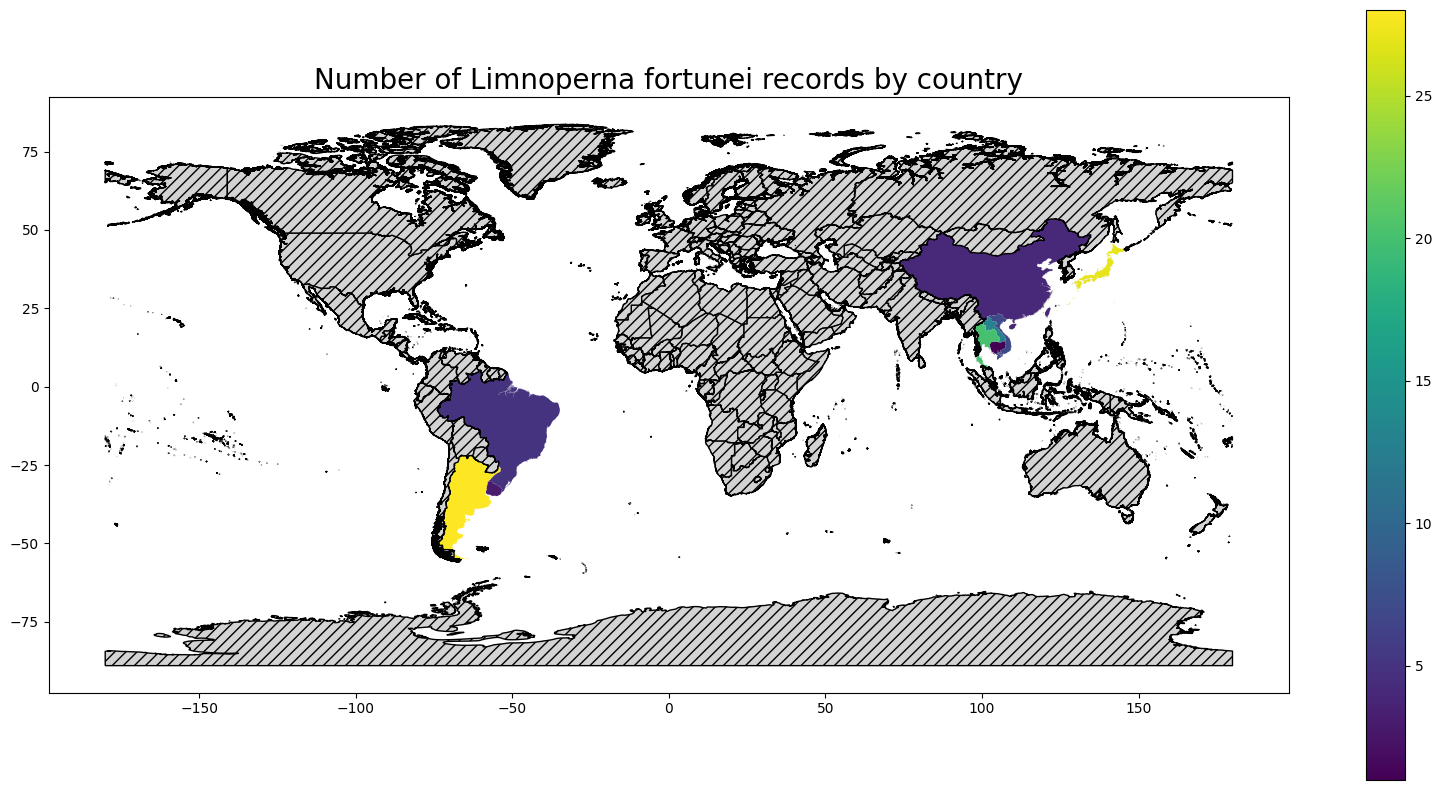

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

ax.set_title("Number of Limnoperna fortunei records by country", fontdict={'fontsize': 20, 'fontweight': 'medium'})

occurrences_gpd.plot(ax=ax, column='countryOccurrences', legend=True,
                    missing_kwds={
                        "color": "lightgrey",
                        "edgecolor": "black",
                        "hatch": "///",
                        "label": "Missing values",
                    })